# Hopfield Networks

The seminal [reference (pdf)](http://www.pnas.org/content/pnas/79/8/2554.full.pdf). Completely readable. Not that long. Take a look.

## A quick look at the homework and python dictionaries

In [1]:
import numpy as np

In [14]:
wor   = [0.2,0.2,0.1]
wand  = [0.2,0.2,-0.1]
wnand = [-0.2,-0.2,0.3]
wdict = {'or':wor,'and':wand,'nand':wnand}
inputs = [[-1,-1,1],[-1,1,1],[1,-1,1],[1,1,1]]

def checkfxn (inp,ws):
    interim = [(1 if (np.dot(inp,ws['or'])> 0) else -1),(1 if (np.dot(inp,ws['nand'])>0) else -1)]
    interim.append(1)
    return(1 if (np.dot(interim, ws['and']) > 0) else -1)
    
for i in inputs:
    print(checkfxn(i,wdict))

-1
1
1
-1


Python dictionaries: a convenient way to store values with names. A dictionary is a key:value pairing, like in a dictionary you have the word:definition. Look up the word, you get the definition. Here you look up the key you get the value. I stored my weights for the different booleans with their names. 

## Not all Networks are the Same

1. Feedforward
2. Recurrent
3. Convolutional
4. Multilevel
5. Supervised
6. Unsupervised

### What is important about the Hopfield Net?

- Showed physicists a new realm for their skills
- Added recurrent (i.e. feedback) connections to network design (output becomes input).
- Changed the focus from network architecture to that of a dynamical system.
- Showed that the network could remember and
- It could do some error correction, it can reconstruct the "right" answer from faulty input.

Discussion: Why are these things important?

In [3]:
%load_ext tikzmagic

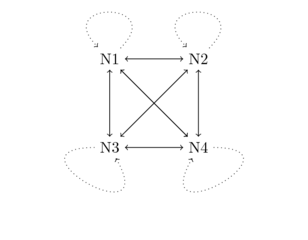

In [43]:
%%tikz
\draw (-1.0,1.0)  node (A) {N1};
\draw (1.0 , 1.0) node (B) {N2};
\draw (-1.0 , -1.0) node (C) {N3};
\draw (1.0 , -1.0) node (D) {N4};
\draw [dotted,loop] (A) edge (A);
\draw [dotted,loop] (B) edge (B);
\draw [->,dotted,loop,looseness=10,out=180,in=300] (C) edge (C);
\draw [->,dotted,loop,looseness=10,out=0,in =240] (D) edge (D);
\draw [<->] (A) edge (B) (A) edge (C) (A) edge (D);
\draw [<->] (B) edge (C) (B) edge (D) (A) edge (D);
\draw [<->] (C)  edge (D);


How does a network like this work?

Each node has a value.

Each of those arrowheads has an associated weight.

The dotted lines indicate that those connections are missing. There are no self connections. Later you will tell me why this *must* be the case.

Tests of understanding:

1. Tell me what the input for a network like this in terms of the linear algebra constructs we have talked about.
2. Tell me what the weights look like in terms of the linear algebra objects we know about.
3. How might we conceive of "running" the network for one cycle in terms of the above.
   Althought we will do it that way for a bit, that is not actually how it is done typically.

### Let's Work Some Examples

In [47]:
%%latex
A = \(\{1,0,1,0\}^T\)

B = \(\{0,1,0,1\}^T\)


<IPython.core.display.Latex object>

Weight matrix, W, is,

In [48]:
%%latex
\begin{bmatrix}
0 & -3 & 3 & -3\\
-3 & 0 & -3 & 3\\
3 & -3 & 0 & -3\\
-3 & 3 & -3 & 0\\
\end{bmatrix}

<IPython.core.display.Latex object>

Threshold rule: 

$output(t)=\{\begin{array}{c} 1\; \mbox{if }  t \geq \Theta\\ 0\; \mbox{if } t < \Theta \end{array}$

Let $\Theta = 0$.

What are the outputs for each input pattern?

What would you guess you would get for an input of $\{1,0,0,0\}^{T}$ and why? 

In [ ]:
What do you get?

Is A or B **closer**?

What does it mean for something to be **closer**?

#### Distance Metrics

Non-negative; symmetric; identity; [triangle-inequality](https://en.wikipedia.org/wiki/Triangle_inequality).

#### [Hamming Distance](https://en.wikipedia.org/wiki/Hamming_distance)

Count the differences in bits.

Digression: Don't forget to think about geometry and dynamics.

In the Perceptron lecture, we talked about how the
weight vector moved around. But here we don't have the weight vector
moving, but we are changing the points on the input. You can think of
this as a point moving around in a four dimensional space. At each point
in time, there is a new coordinate position. This is a dynamical system.
What Hopfield did was, in part, use the language of physics to describe
and evaluate what a network was doing. In his case, he used the idea of
"energy" to compute the state of the network and to show that it would,
under his conditions, achieve a minimum. 

Hebb [Outer Product](https://en.wikipedia.org/wiki/Outer_product) Rule The strength of a change in a connection is
equal to the product of the input and outputs, i.e.
$$\Delta A[i,j] = \eta f[j]g[i]$$ and $$g[i] = \sum_jA[i,j]f[j]$$
therefore, $$\vec{g} = \mathbf{Af}$$ 

Does it matter that the
$\mathbf{A}$ comes first?

How should we think of $\mathbf{A}$? 

Why is there a $\mathbf{W}$ in what follows instead of an $\mathbf{A}$?

Why is the outer product rule named after Hebb?

### Class Exercise 

1. Assume that $\vec{g}$ and $\vec{f}$ are each three elements in length.
2. Assume that the $\mathbf{W}$ starts at zero, and that one pattern is learned.
3. Write the matrix $\mathbf{W}$ in a symbolic form, that is with $f's$ and $g's$ and $A's$; not numbers.
4. Then, when you have done that, and see if you can find a more compact way to represent the matrix $\mathbf{W}$ using the vectors $\vec{f}$ and $\vec{g}$.

In [1]:
%%latex
\(\mathbf{W}\) = $\eta \times
\begin{bmatrix}
f[1]g[1] & f[2]g[1] & f[3]g[1]\\
f[1]g[2] & f[2]g[2] & f[3]g[2]\\
f[1]g[3] & f[2]g[3] & f[3]g[3]
\end{bmatrix} = \eta \, \vec{g} \, \vec{f}^T$

<IPython.core.display.Latex object>

Now, suppose that we call the matrix $\vec{g}\,\vec{f^T}, \mathbf{W}$.

What is the result of submitting $\vec{f}$ as an input?

$\vec{g'} = \mathbf{W}\vec{f}$ 

substitute for $\mathbf{W}$.

$\vec{g'} = \vec{g} \, \vec{f^T} \, \vec{f} \propto \vec{g}$.

Why?

Homework Assignment:
TL:DR Create a random data set of input patterns, generate the weights necessary to properly decode the inputs, show the code for their computation, and then demonstrate with at least one example that the network is robust to some noise.

More detailed:
1. Make the input patterns 2-d, square and of size "n".
2. Use a bipolar system and have, roughly, equal numbers of +1s and -1s in your patterns
3. Make a few of them and store them in some sort of data structure.
4. Using those patterns compute the weight matrix with the following equation:
$$ w_{ij} =\frac{1}{N} \sum_{\mu} value^\mu_i \times value^\mu_j$$
Where N is the size of the patters, that is how many "neurons". $\mu$ is an index for each of the patterns, and $i$ and $j$ refer to the neurons in the pattern $\mu$. Do this **in code**. The computer is good for this manual, repetitive sort of stuff.
5. Program an asynchronous updating rule, run your network until it stablelizes, and then show that you get back what you put in.
6. Then do the same for at least one disrupted pattern (where you flipped a couple of bits around.)

###### Imports

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as p
import random as r
import numpy as np
import copy

###### Generate Random Size and Number of Patterns

In [2]:
def hopGenSzN ():
    pn = r.randint(5,10)
    psz = np.repeat(r.randint(3,6),2)
    return((pn,psz))

###### Function to make random patterns

In [3]:
def hopMkPatts(numPs2Make,psize):
    ps = []
    for n in range(numPs2Make):
        tobepatt = np.array([[(np.round(r.random()) *2) - 1 for i in range(psize[0])] for j in range(psize[1])])
        ps.append(tobepatt)
    return(ps)

###### Function to Make Weight Matrix for a set of Generated Patterns

In [4]:
def hopMkWts(patterns):
    w = np.zeros(list(map((lambda x: x**2),patterns[0].shape)))
    for p in patterns:
        w = (1.0/p.size)*(w + np.outer(p,p))
    np.fill_diagonal(w,0)
    return(w)


In [5]:
def hopLoop(patt,wts):
    inpatt = patt
    while True:
        rws = list(range(patt.shape[0]))
        cls = list(range(patt.shape[1]))
        r.shuffle(rws)
        r.shuffle(cls)
        testpatt = inpatt
        for rw in rws:
            for cl in cls:
                inpatt[rw][cl] = 1.0 if ((np.reshape(inpatt,(1,inpatt.size))
                                        @ wts[rw]) * inpatt[rw][cl]) > 0 else -1
        if (np.all(testpatt == inpatt)): break
    return(patt)

###### Function to Loop Asynchronously Through all the Elements of a Pattern Until Output is Stable

###### A Function to Visualize the Output

In [6]:
def hopPlot(ins,outs): 
    r = len(ins)
    c = 3
    pltcntr = 1
    for i in range(r):
        p.subplot(r,3,pltcntr)
        p.imshow(ins[i])
        p.subplot(r,3,(pltcntr+1))
        p.imshow(outs[i])
        p.subplot(r,3,(pltcntr+2))
        p.imshow(ins[i]-outs[i])
        pltcntr = pltcntr+3
    return(p)

###### Example of How to Use

In [7]:
r.seed(1234)
myn,mysz = hopGenSzN()
myps = hopMkPatts(myn,mysz)
w = hopMkWts(myps)
new_pats = copy.deepcopy(myps)
outps = []
for inp in myps:
    op = hopLoop(inp,w)
    outps.append(op)

In [9]:
display(myps[0])
display(outps[0])
display(myps[0] - outps[0])


array([[ 1., -1., -1.],
       [ 1.,  1., -1.],
       [-1.,  1.,  1.]])

array([[ 1., -1., -1.],
       [ 1.,  1., -1.],
       [-1.,  1.,  1.]])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [11]:
display(new_pats[0])
display(new_pats[0] - outps[0])

array([[-1.,  1.,  1.],
       [ 1.,  1., -1.],
       [ 1., -1., -1.]])

array([[-2.,  2.,  2.],
       [ 0.,  0.,  0.],
       [ 2., -2., -2.]])

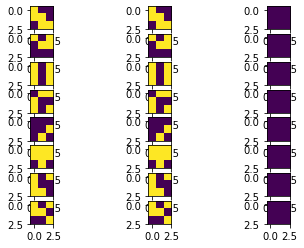

In [47]:
myp = hopPlot(myps,outps)

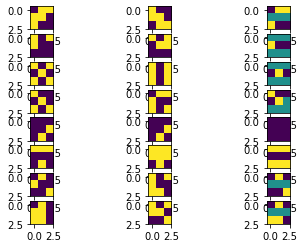

In [48]:
myp = hopPlot(new_pats,outps)